In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
import os
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/zg/ds4nwmvx3kq28hn4r4zwbbw80000gp/T/ipykernel_55046/3244023466.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ds_version = "V1_0"
root_data_path = os.path.join("..", "data", ds_version)
data_path = os.path.join(root_data_path, "metadata")

In [3]:
# focus + no focus
file_name = "effnet_scenery_prediction-road_scenery-20240711_093021.csv"

# focus only


In [5]:
pred = pd.DataFrame()
# surface = file_name.split("_")[0]
print(f"reading {file_name}")
df = pd.read_csv(os.path.join(data_path, file_name))
# df["surface_pred"] = surface
pred = pd.concat([pred, df])

pred.rename(columns={"Image": "image_id", "Prediction": "scenery_probability", "Level_0": "scenery_label_pred"}, inplace=True)

reading effnet_scenery_prediction-road_scenery-20240711_093021.csv


In [6]:
pred

,image_id,scenery_probability,Level,scenery_label_pred,is_in_validation
0,1002484893825364,0.996729,scenery,1_1_road__1_1_rails_on_road,0.0
1,1002484893825364,0.000335,scenery,1_1_road__1_1_road_general,0.0
2,1002484893825364,0.000323,scenery,1_2_cycleway__1_2_hochbord,0.0
3,1002484893825364,0.000255,scenery,1_2_cycleway__1_2_lane,0.0
4,1002484893825364,0.000107,scenery,1_3_pedestrian__1_3_pedestrian_area,0.0
...,...,...,...,...,...
6214,935618673917562,0.000098,scenery,1_3_pedestrian__1_3_pedestrian_area,0.0
6215,935618673917562,0.000674,scenery,1_3_pedestrian__1_3_railway_platform,0.0
6216,935618673917562,0.000297,scenery,1_3_pedestrian__1_3_sidewalk,0.0
6217,935618673917562,0.000115,scenery,1_4_path__1_4_path_unspecified,0.0


In [7]:
# the prediction holds a value for each surface and a class probability. Only keep the highest prob.
idx = pred.groupby("image_id")["scenery_probability"].idxmax()
pred = pred.loc[idx]
pred


,image_id,scenery_probability,Level,scenery_label_pred,is_in_validation
3176,102376292162352,0.586037,scenery,2_1_no_focus_no_street__2_1_all,1.0
2832,103194292097226,0.996756,scenery,1_3_pedestrian__1_3_sidewalk,0.0
298,103629748692983,0.774197,scenery,1_1_road__1_1_road_general,0.0
307,104379059096578,0.995494,scenery,1_1_road__1_1_road_general,0.0
1900,105366992004127,0.497239,scenery,1_1_road__1_1_road_general,1.0
...,...,...,...,...,...
4246,5763709106992911,0.990958,scenery,1_4_path__1_4_path_unspecified,0.0
6101,5937309349699591,0.921905,scenery,2_1_no_focus_no_street__2_1_all,1.0
1712,6111230058996346,0.981747,scenery,1_2_cycleway__1_2_hochbord,0.0
6137,6273449889374724,0.905929,scenery,2_1_no_focus_no_street__2_1_all,1.0


In [9]:
annot = pd.read_csv(os.path.join(data_path, "annotations_scenery_v2.csv"))
annot.rename(columns={"road_scenery": "scenery_label_true"}, inplace=True)

In [10]:
df = pred.set_index("image_id").join(annot[["image_id", "scenery_label_true"]].set_index("image_id"), how="left")
df

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
102376292162352,0.586037,scenery,2_1_no_focus_no_street__2_1_all,1.0,1_4_path__1_4_path_unspecified
103194292097226,0.996756,scenery,1_3_pedestrian__1_3_sidewalk,0.0,1_3_pedestrian__1_3_sidewalk
103629748692983,0.774197,scenery,1_1_road__1_1_road_general,0.0,1_1_road__1_1_road_general
104379059096578,0.995494,scenery,1_1_road__1_1_road_general,0.0,1_1_road__1_1_road_general
105366992004127,0.497239,scenery,1_1_road__1_1_road_general,1.0,1_2_cycleway__1_2_lane
...,...,...,...,...,...
5763709106992911,0.990958,scenery,1_4_path__1_4_path_unspecified,0.0,1_4_path__1_4_path_unspecified
5937309349699591,0.921905,scenery,2_1_no_focus_no_street__2_1_all,1.0,2_1_no_focus_no_street__2_1_all
6111230058996346,0.981747,scenery,1_2_cycleway__1_2_hochbord,0.0,1_2_cycleway__1_2_hochbord


In [11]:
# exclude not recognizable
# df = df[df.surface_true.notna()]

In [12]:
df.groupby(["image_id"]).size().sort_values(ascending=False)

image_id
102376292162352     1
378729260549236     1
359091202388839     1
363457948441822     1
365313261562950     1
                   ..
158531406824852     1
159117356145022     1
159375323477648     1
160338122707486     1
7124459054305360    1
Length: 691, dtype: int64

In [13]:
df.groupby(["scenery_label_true"]).size()

scenery_label_true
1_1_road__1_1_rails_on_road              33
1_1_road__1_1_road_general               82
1_2_cycleway__1_2_hochbord               96
1_2_cycleway__1_2_lane                   47
1_3_pedestrian__1_3_pedestrian_area      39
1_3_pedestrian__1_3_railway_platform     17
1_3_pedestrian__1_3_sidewalk             37
1_4_path__1_4_path_unspecified          127
2_1_no_focus_no_street__2_1_all         213
dtype: int64

In [14]:
df_valid = df[df.is_in_validation == 1]
df_train = df[df.is_in_validation == 0]

In [15]:
# df.groupby(["is_in_validation", "scenery_label_true"]).size().to_csv("test.csv")

## Global measures

In [16]:
def compute_measures(true_label, pred_label):
    m = {
    "accuracy": sum(true_label == pred_label) / len(true_label),
    # "correlation": np.corrcoef(true_float, pred_float)[0, 1],
    # "r_square": r2_score(true_float, pred_float),
    # "mse": mean_squared_error(true_float, pred_float)
    }
    # m["rmse"] = np.sqrt(m["mse"])
    return m

In [17]:
# all
gm = compute_measures(df.scenery_label_true, df.scenery_label_pred)
gm_valid = compute_measures(df_valid.scenery_label_true, df_valid.scenery_label_pred)
gm_train = compute_measures(df_train.scenery_label_true, df_train.scenery_label_pred)
pd.concat([pd.Series(gm, name="all"), pd.Series(gm_valid, name="validation"), pd.Series(gm_train, name="train")], axis=1).round(2)

,all,validation,train
accuracy,0.95,0.8,0.98


## Measures by surface class

In [18]:
# all
# gm_surface = pd.DataFrame()
# for surface in df.surface_true.unique():
#     df_ = df[df.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

In [19]:
# all
# gm_surface = pd.DataFrame()
# for surface in df.surface_true.unique():
#     df_ = df[df.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

In [20]:
# only validation
# gm_surface = pd.DataFrame()
# for surface in df_valid.surface_true.unique():
#     df_ = df_valid[df_valid.surface_true == surface]
#     gm = compute_measures(df_.quality_float_true, df_.quality_float_pred)
#     gm_surface = pd.concat([gm_surface, pd.Series(gm, name=surface)], axis=1)

# gm_surface.round(2)

## compare float values

In [21]:
df = df_valid
# df = df_train
df

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
102376292162352,0.586037,scenery,2_1_no_focus_no_street__2_1_all,1.0,1_4_path__1_4_path_unspecified
105366992004127,0.497239,scenery,1_1_road__1_1_road_general,1.0,1_2_cycleway__1_2_lane
106231631529049,0.999562,scenery,2_1_no_focus_no_street__2_1_all,1.0,2_1_no_focus_no_street__2_1_all
106613138155354,0.997684,scenery,2_1_no_focus_no_street__2_1_all,1.0,2_1_no_focus_no_street__2_1_all
108861071778781,0.984821,scenery,1_1_road__1_1_road_general,1.0,1_1_road__1_1_road_general
...,...,...,...,...,...
2793261484322305,0.988892,scenery,1_1_road__1_1_road_general,1.0,1_1_road__1_1_road_general
2967778960131761,0.875496,scenery,1_2_cycleway__1_2_lane,1.0,1_2_cycleway__1_2_lane
5667900639976490,0.962292,scenery,1_2_cycleway__1_2_hochbord,1.0,1_2_cycleway__1_2_hochbord


In [22]:
# Plot
# np.random.seed(5)
# colors = {surface_type: np.random.rand(3,) for surface_type in df.surface_true.unique()}

# sns.scatterplot(data=df, x="quality_float_true", y="quality_float_pred", hue="surface_true", palette=colors, legend="full")
# plt.xlabel('True')
# plt.ylabel('Pred')
# plt.title('True vs. Pred quality by surface')
# plt.show()


In [23]:
# sns.set_style("whitegrid")

# # Create a FacetGrid
# g = sns.FacetGrid(df, col="surface_true", col_wrap=3)

# # Map scatter plot for each surface type
# g.map(sns.scatterplot, "quality_float_true", "quality_float_pred")

# plt.show()

#### Hom much do the deviate?

In [24]:
# df["deviation"] = df.quality_float_true - df.quality_float_pred

**Overall**

In [25]:
# df.deviation.hist(bins=20)

**by surface**

In [26]:
# # Create a FacetGrid for histograms
# g_hist = sns.FacetGrid(df, col="surface_true", col_wrap=3)

# # Map histogram for deviation for each surface type
# g_hist.map(plt.hist, "deviation", color='green', density=True, bins=20)

# plt.show()

## compare classes

In [27]:
selected_classes = {
        '1_1_road': [
            '1_1_rails_on_road',
            '1_1_road_general',
        ],
        '1_2_cycleway': [
            '1_2_hochbord',
            '1_2_lane',
        ],
        '1_3_pedestrian': [
            '1_3_pedestrian_area',
            '1_3_railway_platform',
            '1_3_sidewalk',
        ],
        '1_4_path': [
            '1_4_path_unspecified',
        ],
        '2_1_no_focus_no_street': [
            '2_1_all'
        ],
    }

valid_labels = []
for key, values in selected_classes.items():
    for value in values:
        label = key + '__' + value
        valid_labels.append(label)

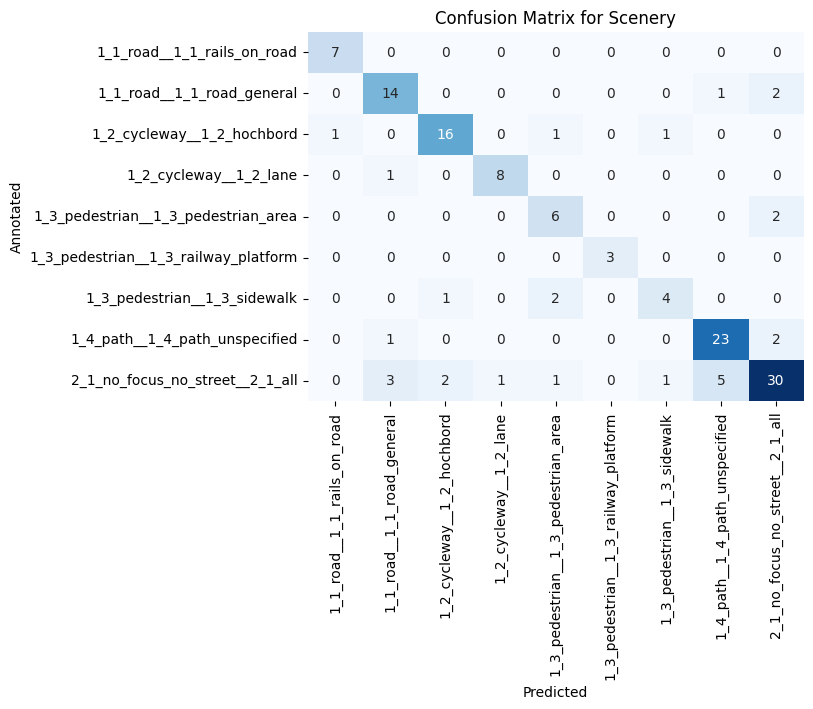

In [28]:
# Plotting the confusion matrix using seaborn heatmap

cm = confusion_matrix(df.scenery_label_true, df.scenery_label_pred, labels=valid_labels)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=valid_labels,
            yticklabels=valid_labels)
plt.title(f"Confusion Matrix for Scenery")
plt.xlabel("Predicted")
plt.ylabel("Annotated")
plt.show()

In [29]:
df[df.scenery_label_true.isin(valid_labels)]

,scenery_probability,Level,scenery_label_pred,is_in_validation,scenery_label_true
image_id,,,,,
102376292162352,0.586037,scenery,2_1_no_focus_no_street__2_1_all,1.0,1_4_path__1_4_path_unspecified
105366992004127,0.497239,scenery,1_1_road__1_1_road_general,1.0,1_2_cycleway__1_2_lane
106231631529049,0.999562,scenery,2_1_no_focus_no_street__2_1_all,1.0,2_1_no_focus_no_street__2_1_all
106613138155354,0.997684,scenery,2_1_no_focus_no_street__2_1_all,1.0,2_1_no_focus_no_street__2_1_all
108861071778781,0.984821,scenery,1_1_road__1_1_road_general,1.0,1_1_road__1_1_road_general
...,...,...,...,...,...
2793261484322305,0.988892,scenery,1_1_road__1_1_road_general,1.0,1_1_road__1_1_road_general
2967778960131761,0.875496,scenery,1_2_cycleway__1_2_lane,1.0,1_2_cycleway__1_2_lane
5667900639976490,0.962292,scenery,1_2_cycleway__1_2_hochbord,1.0,1_2_cycleway__1_2_hochbord


In [30]:
# Extract predicted and ground truth values

class_precision = precision_score(df[df.scenery_label_true.isin(valid_labels)].scenery_label_true, df[df.scenery_label_true.isin(valid_labels)].scenery_label_pred, average='weighted')
class_recall = recall_score(df[df.scenery_label_true.isin(valid_labels)].scenery_label_true, df[df.scenery_label_true.isin(valid_labels)].scenery_label_pred, average='weighted')

print(f"Count: {len(df)}")
print(f"Precision: {round(class_precision, 2)}")
print(f"Recall: {round(class_recall, 2)}")
print("------------------------")


Count: 139
Precision: 0.8
Recall: 0.8
------------------------


In [31]:
# all images that were incorrectly classified
misclassification = df[(df.scenery_label_pred != df.scenery_label_true) & (df.is_in_validation == 1)]

In [32]:
misclassification = misclassification.sort_values("image_id")
misclassification.reset_index( inplace=True)
os.makedirs(os.path.join(data_path, "model_predictions"), exist_ok=True)
misclassification[["image_id", "is_in_validation", "scenery_probability",
                   "scenery_label_true", "scenery_label_pred"]
                   ].to_csv(os.path.join(data_path, "model_predictions", "misclassification_scenery_v2.csv"), index=False)

In [129]:
# store missclassified images in folder
import shutil

path = os.path.join(data_path, "model_predictions", "misclassified_images", "scenery")
os.makedirs(path, exist_ok=True)
for i in range(len(misclassification)):  # len(misclassification)
    img = misclassification.loc[i]
    img_path = os.path.join(root_data_path, "road_scenery")
    destination_folder_path = os.path.join(path, img.scenery_label_true, img.scenery_label_pred)
    os.makedirs(destination_folder_path, exist_ok=True)
    destination_path = os.path.join(destination_folder_path, f"{img.image_id}.jpg")
    folders = img.scenery_label_true.split("__")
    image_filename = os.path.join(img_path, folders[0], folders[1], f"{img.image_id}.jpg")
    shutil.copy(image_filename, destination_folder_path)

In [52]:
# store missclassified images in folder
# path = "/Users/alexandra/Nextcloud-HTW/SHARED/SurfaceAI/data/mapillary_images/training/V4/metadata/model_predictions/VGG16_V4_not_annotated/missclassified_wo_nostreet"
# os.makedirs(path, exist_ok=True)
# for image_id in misclassification_wo_nostreet.index:
#     destination_path = os.path.join(path, f"{image_id}.jpg")
#     image_filename = os.path.join("/Users/alexandra/Nextcloud-HTW/SHARED/SurfaceAI/data/mapillary_images/training/V4/unsorted_images", f"{image_id}.jpg")
#     shutil.copy(image_filename, destination_path)